In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [2]:
# Load dataset
laptop_df = pd.read_csv("D:/Self shimts/real shit/Madhan - laptop/laptop_prices.csv")
laptop_df

Brand    Processor  RAM (GB)    Storage                 GPU  \
0        Apple  AMD Ryzen 3        64  512GB SSD     Nvidia GTX 1650   
1        Razer  AMD Ryzen 7         4    1TB SSD     Nvidia RTX 3080   
2         Asus     Intel i5        32    2TB SSD     Nvidia RTX 3060   
3       Lenovo     Intel i5         4  256GB SSD     Nvidia RTX 3080   
4        Razer     Intel i3         4  256GB SSD  AMD Radeon RX 6600   
...        ...          ...       ...        ...                 ...   
11763     Acer     Intel i3         4    2TB SSD     Nvidia RTX 2060   
11764     Asus     Intel i3         4    2TB SSD  AMD Radeon RX 6800   
11765    Razer  AMD Ryzen 9         4    2TB SSD  AMD Radeon RX 6600   
11766  Samsung  AMD Ryzen 7        16  512GB SSD          Integrated   
11767  Samsung     Intel i7         8  256GB SSD     Nvidia RTX 3080   

       Screen Size (inch) Resolution  Battery Life (hours)  Weight (kg)  \
0                    17.3  2560x1440                   8.9         1.42   
1                    14.0   1366x768                   9.4         2.57   
2                    13.3  3840x2160                   8.5         1.74   
3                    13.3   1366x768                  10.5         3.10   
4                    16.0  3840x2160                   5.7         3.38   
...                   ...        ...                   ...          ...   
11763                17.3   1366x768                  11.5         1.58   
11764                16.0   1366x768                   9.5         2.14   
11765                15.6  2560x1440                   8.2         2.05   
11766                13.3  1920x1080                   7.5         1.48   
11767                17.3  2560x1440                   6.4         2.45   

      Operating System  Price ($)  
0              FreeDOS    3997.07  
1                Linux    1355.78  
2              FreeDOS    2673.07  
3              Windows     751.17  
4                Linux    2059.83  
...                ...        ...  
11763            macOS     704.82  
11764            Linux     775.59  
11765            Linux    2789.46  
11766            macOS    1067.13  
11767          FreeDOS    1579.55  

[11768 rows x 11 columns]

In [3]:
laptop_df.isna().sum()

Brand                   0
Processor               0
RAM (GB)                0
Storage                 0
GPU                     0
Screen Size (inch)      0
Resolution              0
Battery Life (hours)    0
Weight (kg)             0
Operating System        0
Price ($)               0
dtype: int64

In [ ]:
laptop_df.shape

(11768, 11)

In [10]:
laptop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11768 entries, 0 to 11767
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Brand                 11768 non-null  object 
 1   Processor             11768 non-null  object 
 2   RAM (GB)              11768 non-null  int64  
 3   Storage               11768 non-null  object 
 4   GPU                   11768 non-null  object 
 5   Screen Size (inch)    11768 non-null  float64
 6   Resolution            11768 non-null  object 
 7   Battery Life (hours)  11768 non-null  float64
 8   Weight (kg)           11768 non-null  float64
 9   Operating System      11768 non-null  object 
 10  Price ($)             11768 non-null  float64
dtypes: float64(4), int64(1), object(6)
memory usage: 1011.4+ KB


In [11]:
laptop_df.describe()

RAM (GB)  Screen Size (inch)  Battery Life (hours)   Weight (kg)  \
count  11768.000000        11768.000000          11768.000000  11768.000000   
mean      24.852821           15.212305              8.027855      2.341117   
std       21.762567            1.436997              2.305400      0.667921   
min        4.000000           13.300000              4.000000      1.200000   
25%        8.000000           14.000000              6.000000      1.760000   
50%       16.000000           15.600000              8.000000      2.340000   
75%       32.000000           16.000000             10.000000      2.910000   
max       64.000000           17.300000             12.000000      3.500000   

          Price ($)  
count  11768.000000  
mean    2183.571608  
std     1316.886132  
min      279.570000  
25%     1272.045000  
50%     1840.865000  
75%     2698.370000  
max    10807.880000

In [12]:

# Feature Engineering: Splitting resolution
laptop_df[['Width', 'Height']] = laptop_df['Resolution'].str.split('x', expand=True).astype(int)
laptop_df.drop(columns=['Resolution'], inplace=True)

# Encoding categorical variables
label_encoders = {}
for col in ['Brand', 'Processor', 'Storage', 'GPU', 'Operating System']:
    le = LabelEncoder()
    laptop_df[col] = le.fit_transform(laptop_df[col])
    label_encoders[col] = le

laptop_df

Brand  Processor  RAM (GB)  Storage  GPU  Screen Size (inch)  \
0          1          0        64        4    3                17.3   
1          8          2         4        1    6                14.0   
2          2          5        32        3    5                13.3   
3          5          5         4        2    6                13.3   
4          8          4         4        2    0                16.0   
...      ...        ...       ...      ...  ...                 ...   
11763      0          4         4        3    4                17.3   
11764      2          4         4        3    1                16.0   
11765      8          3         4        3    0                15.6   
11766      9          2        16        4    2                13.3   
11767      9          6         8        2    6                17.3   

       Battery Life (hours)  Weight (kg)  Operating System  Price ($)  Width  \
0                       8.9         1.42                 0    3997.07   2560   
1                       9.4         2.57                 1    1355.78   1366   
2                       8.5         1.74                 0    2673.07   3840   
3                      10.5         3.10                 2     751.17   1366   
4                       5.7         3.38                 1    2059.83   3840   
...                     ...          ...               ...        ...    ...   
11763                  11.5         1.58                 3     704.82   1366   
11764                   9.5         2.14                 1     775.59   1366   
11765                   8.2         2.05                 1    2789.46   2560   
11766                   7.5         1.48                 3    1067.13   1920   
11767                   6.4         2.45                 0    1579.55   2560   

       Height  
0        1440  
1         768  
2        2160  
3         768  
4        2160  
...       ...  
11763     768  
11764     768  
11765    1440  
11766    1080  
11767    1440  

[11768 rows x 12 columns]

In [13]:

# Define X and Y
X = laptop_df.drop(columns=['Price ($)'])
y = laptop_df['Price ($)']

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.5, random_state=42)


In [14]:

# Model Training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)


In [ ]:

# Evaluation Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)
print("R² Score (%):",r2*100)


MAE: 330.54
MSE: 232985.73
RMSE: 482.69
R² Score (%): 86.85995631931428


In [16]:
pd.DataFrame(y_pred,y_test)

0
Price ($)           
1240.54    1582.2044
1469.29    1427.7879
2153.12    2125.4545
970.92     1211.2333
1479.22    1138.5872
...              ...
1165.21    1133.0991
1450.75    1887.8834
2762.63    2991.2224
1492.90    1548.8095
918.31      801.6867

[5884 rows x 1 columns]

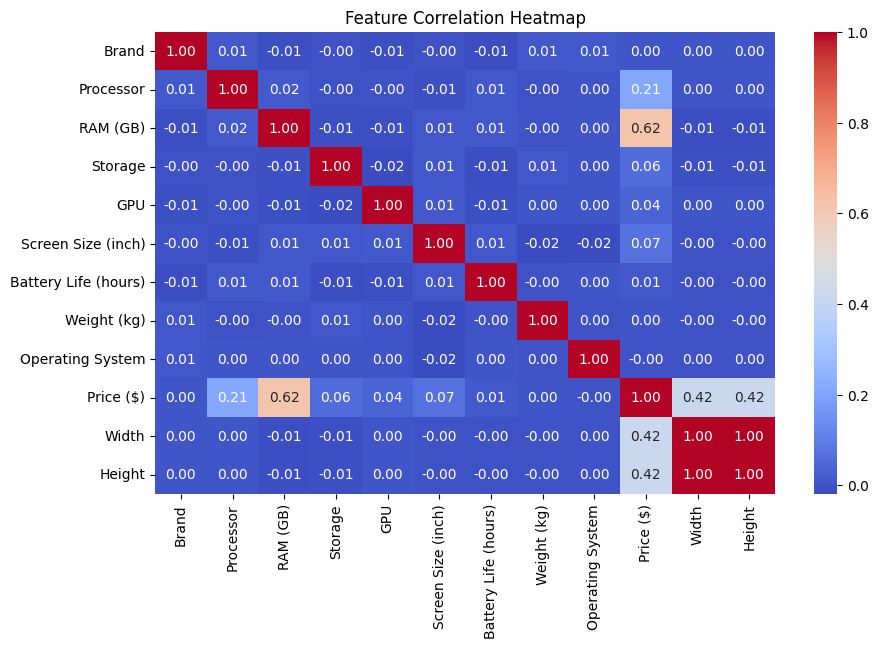

In [17]:


# 1. Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(laptop_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


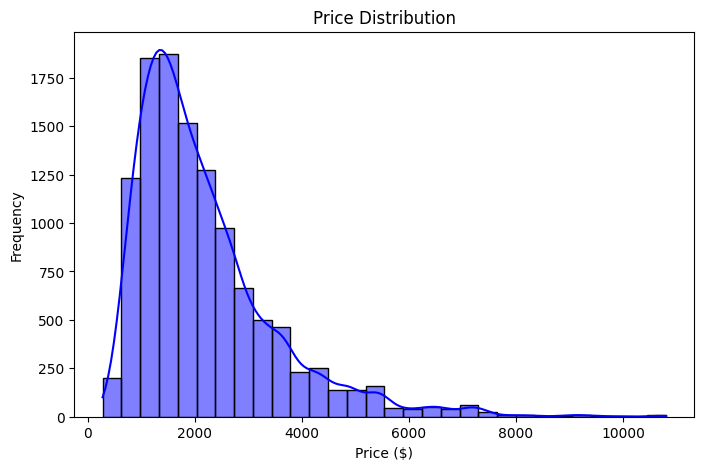

In [19]:

# 3. Distribution of Price
plt.figure(figsize=(8, 5))
sns.histplot(laptop_df['Price ($)'], bins=30, kde=True, color="blue")
plt.title("Price Distribution")
plt.xlabel("Price ($)")
plt.ylabel("Frequency")
plt.show()


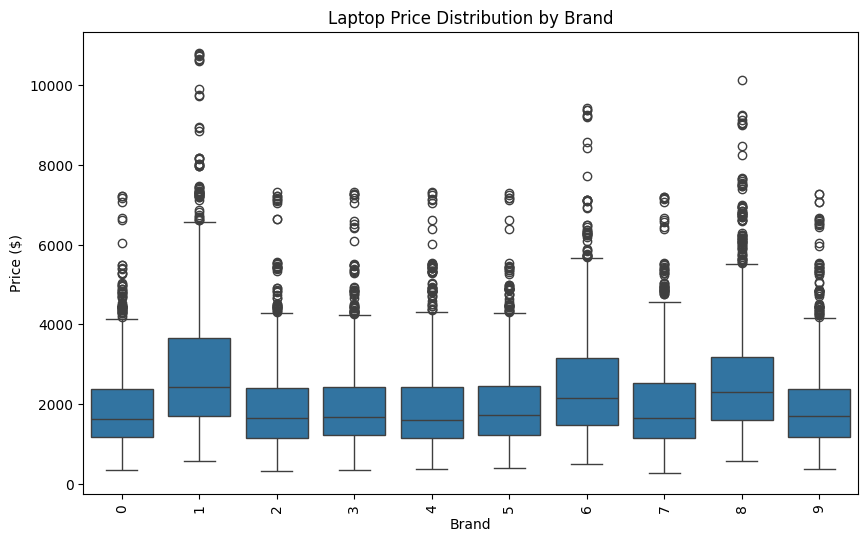

In [20]:

# 4. Boxplot of Price by Brand
plt.figure(figsize=(10, 6))
sns.boxplot(x=laptop_df['Brand'], y=laptop_df['Price ($)'])
plt.xticks(rotation=90)
plt.title("Laptop Price Distribution by Brand")
plt.show()
